<a href="https://colab.research.google.com/github/janel-dsbc/Deep-Dive-Projects/blob/main/FinalSQL_1_ChinookProject3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [44]:
from google.colab import auth
from google.colab import syntax
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [45]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [46]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [47]:
!unzip -u chinook.zip


Archive:  chinook.zip


In [48]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables


albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [49]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema


CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)

* Basic Queries
  * *SELECT* (with * and with column names)
  * *WHERE*
  * *AND*
  * *OR*
  * *LIKE* (with % or _ wildcard)
  * *BETWEEN*
  * *LIMIT*

* Sorting and Grouping
  * *ORDER BY*
  * *DISTINCT*
  * *GROUP BY*

* Aggregates
  * *MAX*
  * *MIN*
  * *SUM*
  * *AVG*
  * *COUNT*



In [50]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
LIMIT 5

CustomerId  FirstName  LastName     Company                                           Address                          City                 State  Country         PostalCode  Phone               Fax                 Email                     SupportRepId
----------  ---------  -----------  ------------------------------------------------  -------------------------------  -------------------  -----  --------------  ----------  ------------------  ------------------  ------------------------  ------------
1           Luís       Gonçalves    Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170  São José dos Campos  SP     Brazil          12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br      3           
2           Leonie     Köhler                                                         Theodor-Heuss-Straße 34          Stuttgart                   Germany         70174       +49 0711 2842222                        leonekohler@surfeu.de  

In [51]:
%%script sqlite3 --column --header chinook.db
SELECT MIN(supportrepid)
FROM customers


MIN(supportrepid)
-----------------
3                


In [52]:
%%script sqlite3 --column --header chinook.db
SELECT MAX(supportrepid)
FROM customers

MAX(supportrepid)
-----------------
5                


Provide a query showing Customers (just their full names, customer ID and country) who are not in the US.

In [53]:
%%script sqlite3 --column --header chinook.db
SELECT CustomerId, FirstName, LastName, Country
FROM customers
WHERE Country != 'USA'

CustomerId  FirstName  LastName      Country       
----------  ---------  ------------  --------------
1           Luís       Gonçalves     Brazil        
2           Leonie     Köhler        Germany       
3           François   Tremblay      Canada        
4           Bjørn      Hansen        Norway        
5           František  Wichterlová   Czech Republic
6           Helena     Holý          Czech Republic
7           Astrid     Gruber        Austria       
8           Daan       Peeters       Belgium       
9           Kara       Nielsen       Denmark       
10          Eduardo    Martins       Brazil        
11          Alexandre  Rocha         Brazil        
12          Roberto    Almeida       Brazil        
13          Fernanda   Ramos         Brazil        
14          Mark       Philips       Canada        
15          Jennifer   Peterson      Canada        
29          Robert     Brown         Canada        
30          Edward     Francis       Canada        
31          

Provide a query only showing the Customers from Brazil.

In [54]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
where Country = 'Brazil'

CustomerId  FirstName  LastName   Company                                           Address                          City                 State  Country  PostalCode  Phone               Fax                 Email                          SupportRepId
----------  ---------  ---------  ------------------------------------------------  -------------------------------  -------------------  -----  -------  ----------  ------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves  Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170  São José dos Campos  SP     Brazil   12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br           3           
10          Eduardo    Martins    Woodstock Discos                                  Rua Dr. Falcão Filho, 155        São Paulo            SP     Brazil   01007-010   +55 (11) 3033-5446  +55 (11) 3033-4564  eduardo@woodstock.com.br       4           


Provide a query showing the Invoices of customers who are from Brazil. The resultant table should show the customer's full name, Invoice ID, Date of the invoice and billing country.

In [55]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM INVOICES
LIMIT 5

InvoiceId  CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW           Edmonton     AB            Canada          T6G 2C7            8.91 
5          23          2009-01-11 00:00:00  69 Salem Street          Boston       MA            USA             2113               13.86


In [56]:
%%script sqlite3 --column --header chinook.db
SELECT SUM(TOTAL)
FROM INVOICES

SUM(TOTAL)
----------
2328.6    


In [57]:
%%script sqlite3 --column --header chinook.db
SELECT AVG(TOTAL)
FROM invoices

AVG(TOTAL)      
----------------
5.65194174757282


In [58]:
%%script sqlite3 --column --header chinook.db
SELECT CustomerId, InvoiceId, InvoiceDate, BillingCountry
FROM invoices
WHERE BillingCountry = 'Brazil'
ORDER BY CustomerId

CustomerId  InvoiceId  InvoiceDate          BillingCountry
----------  ---------  -------------------  --------------
1           98         2010-03-11 00:00:00  Brazil        
1           121        2010-06-13 00:00:00  Brazil        
1           143        2010-09-15 00:00:00  Brazil        
1           195        2011-05-06 00:00:00  Brazil        
1           316        2012-10-27 00:00:00  Brazil        
1           327        2012-12-07 00:00:00  Brazil        
1           382        2013-08-07 00:00:00  Brazil        
10          25         2009-04-09 00:00:00  Brazil        
10          154        2010-11-14 00:00:00  Brazil        
10          177        2011-02-16 00:00:00  Brazil        
10          199        2011-05-21 00:00:00  Brazil        
10          251        2012-01-09 00:00:00  Brazil        
10          372        2013-07-02 00:00:00  Brazil        
10          383        2013-08-12 00:00:00  Brazil        
11          57         2009-09-06 00:00:00  Brazil      

In [59]:
%%script sqlite3 --column --header chinook.db
SELECT CustomerId, InvoiceId, InvoiceDate, BillingCountry
FROM invoices
WHERE BillingCountry = 'Brazil' OR BillingCountry = 'Germany'
ORDER BY CustomerId

CustomerId  InvoiceId  InvoiceDate          BillingCountry
----------  ---------  -------------------  --------------
1           98         2010-03-11 00:00:00  Brazil        
1           121        2010-06-13 00:00:00  Brazil        
1           143        2010-09-15 00:00:00  Brazil        
1           195        2011-05-06 00:00:00  Brazil        
1           316        2012-10-27 00:00:00  Brazil        
1           327        2012-12-07 00:00:00  Brazil        
1           382        2013-08-07 00:00:00  Brazil        
2           1          2009-01-01 00:00:00  Germany       
2           12         2009-02-11 00:00:00  Germany       
2           67         2009-10-12 00:00:00  Germany       
2           196        2011-05-19 00:00:00  Germany       
2           219        2011-08-21 00:00:00  Germany       
2           241        2011-11-23 00:00:00  Germany       
2           293        2012-07-13 00:00:00  Germany       
10          25         2009-04-09 00:00:00  Brazil      

Provide a query showing only the Employees who are Sales Agents.

In [60]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees
LIMIT 5

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address              City      State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  -------------------  --------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW  Edmonton  AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW         Calgary   AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Support Agent  2          1973-08-29 00:00:00

In [61]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees
WHERE Title = '%Agent'

In [62]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees
WHERE Title LIKE '%manager'

EmployeeId  LastName  FirstName  Title            ReportsTo  BirthDate            HireDate             Address               City      State  Country  PostalCode  Phone              Fax                Email                  
----------  --------  ---------  ---------------  ---------  -------------------  -------------------  --------------------  --------  -----  -------  ----------  -----------------  -----------------  -----------------------
1           Adams     Andrew     General Manager             1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW   Edmonton  AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com 
2           Edwards   Nancy      Sales Manager    1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW          Calgary   AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com  
6           Mitchell  Michael    IT Manager       1          1973-07-01 00:00:00  2003-10-17 00:00:0

In [63]:
%%script sqlite3 --column --header chinook.db
SELECT EmployeeId, FirstName, LastName
FROM Employees
WHERE Title = 'Sales Support Agent';


EmployeeId  FirstName  LastName
----------  ---------  --------
3           Jane       Peacock 
4           Margaret   Park    
5           Steve      Johnson 


5. Provide a query showing a unique list of billing countries from the Invoice table.

In [64]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
LIMIT 5

InvoiceId  CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW           Edmonton     AB            Canada          T6G 2C7            8.91 
5          23          2009-01-11 00:00:00  69 Salem Street          Boston       MA            USA             2113               13.86


In [65]:
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT BillingCountry
FROM invoices

BillingCountry
--------------
Germany       
Norway        
Belgium       
Canada        
USA           
France        
Ireland       
United Kingdom
Australia     
Chile         
India         
Brazil        
Portugal      
Netherlands   
Spain         
Sweden        
Czech Republic
Finland       
Denmark       
Italy         
Poland        
Austria       
Hungary       
Argentina     


Provide a query showing the invoices of customers who are from Brazil.

In [66]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
WHERE BillingCountry = 'Brazil'

InvoiceId  CustomerId  InvoiceDate          BillingAddress                   BillingCity          BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -------------------------------  -------------------  ------------  --------------  -----------------  -----
25         10          2009-04-09 00:00:00  Rua Dr. Falcão Filho, 155        São Paulo            SP            Brazil          01007-010          8.91 
34         12          2009-05-23 00:00:00  Praça Pio X, 119                 Rio de Janeiro       RJ            Brazil          20040-020          0.99 
35         13          2009-06-05 00:00:00  Qe 7 Bloco G                     Brasília             DF            Brazil          71020-677          1.98 
57         11          2009-09-06 00:00:00  Av. Paulista, 2022               São Paulo            SP            Brazil          01310-200          1.98 
58         13          2009-09-07 00:00:00  Qe 7 Bloco G                     Brasí

Provide a query that shows the invoices associated with each sales agent. The resultant table should include the Sales Agent's full name.

In [67]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoice_items
LIMIT 3

InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
-------------  ---------  -------  ---------  --------
1              1          2        0.99       1       
2              1          4        0.99       1       
3              2          6        0.99       1       


In [68]:
%%script sqlite3 --column --header chinook.db
SELECT CustomerId, Title, FirstName, LastName, EmployeeId
FROM invoices
INNER JOIN employees on InvoiceId = EmployeeId
WHERE Title = 'Sales Support Agent'
LIMIT 5

CustomerId  Title                FirstName  LastName  EmployeeId
----------  -------------------  ---------  --------  ----------
8           Sales Support Agent  Jane       Peacock   3         
14          Sales Support Agent  Margaret   Park      4         
23          Sales Support Agent  Steve      Johnson   5         


Provide a query that shows the Invoice Total, Customer name, Country and Sale Agent name for all invoices and customers.

In [69]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
LIMIT 3

CustomerId  FirstName  LastName   Company                                           Address                          City                 State  Country  PostalCode  Phone               Fax                 Email                  SupportRepId
----------  ---------  ---------  ------------------------------------------------  -------------------------------  -------------------  -----  -------  ----------  ------------------  ------------------  ---------------------  ------------
1           Luís       Gonçalves  Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170  São José dos Campos  SP     Brazil   12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br   3           
2           Leonie     Köhler                                                       Theodor-Heuss-Straße 34          Stuttgart                   Germany  70174       +49 0711 2842222                        leonekohler@surfeu.de  5           
3           François   Tremblay 

In [70]:
%%script sqlite3 --column --header chinook.db
SELECT InvoiceId, Total, BillingCountry, SupportRepId, FirstName,LastName
FROM invoices
INNER JOIN customers ON BillingCountry = Country
LIMIT 5

InvoiceId  Total  BillingCountry  SupportRepId  FirstName  LastName  
---------  -----  --------------  ------------  ---------  ----------
1          1.98   Germany         3             Fynn       Zimmermann
1          1.98   Germany         5             Hannah     Schneider 
1          1.98   Germany         5             Leonie     Köhler    
1          1.98   Germany         3             Niklas     Schröder  
2          3.96   Norway          4             Bjørn      Hansen    


9. How many Invoices were there in 2009 and 2011? What are the respective total sales for each of those years?

In [71]:
%%script sqlite3 --column --header chinook.db
SELECT
    strftime('%Y', InvoiceDate) AS year,
    COUNT(1) AS res_total_sales
FROM
    invoices
WHERE
    strftime('%Y', InvoiceDate) > '2008' AND strftime('%Y', InvoiceDate) < '2012'
GROUP BY
    year;

year  res_total_sales
----  ---------------
2009  83             
2010  83             
2011  83             


In [72]:
#%%script sqlite3 --column --header chinook.db
#SELECT EXTRACT(YEAR FROM InvoiceDate) as year #COUNT(1) as res_total_sales
#FROM invoices
#WHERE year > 2009 and year < 2011

10. Looking at the InvoiceLine table, provide a query that COUNTs the number of line items for Invoice ID 37.

In [73]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
WHERE invoiceId = 37

InvoiceId  CustomerId  InvoiceDate          BillingAddress   BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ---------------  -----------  ------------  --------------  -----------------  -----
37         17          2009-06-06 00:00:00  1 Microsoft Way  Redmond      WA            USA             98052-8300         3.96 


In [74]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT (1) AS num_items
FROM invoice_items
WHERE invoiceId = 37

num_items
---------
4        


11. Looking at the InvoiceLine table, provide a query that COUNTs the number of line items for each Invoice. HINT: GROUP BY

In [75]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoice_items
limit 3

InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
-------------  ---------  -------  ---------  --------
1              1          2        0.99       1       
2              1          4        0.99       1       
3              2          6        0.99       1       


In [76]:
%%script sqlite3 --column --header chinook.db
SELECT InvoiceLineId, COUNT(1) as num_line_items
FROM invoice_items
GROUP BY invoiceid

InvoiceLineId  num_line_items
-------------  --------------
1              2             
3              4             
7              6             
13             9             
22             14            
36             1             
37             2             
39             2             
41             4             
45             6             
51             9             
60             14            
74             1             
75             2             
77             2             
79             4             
83             6             
89             9             
98             14            
112            1             
113            2             
115            2             
117            4             
121            6             
127            9             
136            14            
150            1             
151            2             
153            2             
155            4             
159            6             
165       

19. Which sales agent made the most in sales in 2009?

In [77]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres
LIMIT 5

GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     


In [78]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM media_types
LIMIT 5

MediaTypeId  Name                       
-----------  ---------------------------
1            MPEG audio file            
2            Protected AAC audio file   
3            Protected MPEG-4 video file
4            Purchased AAC audio file   
5            AAC audio file             


18. Provide a query that shows total sales made by each sales agent.

In [79]:
%%script sqlite3 --column --header chinook.db
#Chat assisted
SELECT
    e.EmployeeId,
    e.FirstName || ' ' || e.LastName AS SalesAgent,
    SUM(i.Total) AS TotalSales
FROM
    Employees e
JOIN
    Customers c ON e.EmployeeId = c.SupportRepId
JOIN
    Invoices i ON c.CustomerId = i.CustomerId
WHERE
    e.Title = 'Sales Support Agent'
GROUP BY
    e.EmployeeId, SalesAgent
ORDER BY
    TotalSales DESC;


EmployeeId  SalesAgent     TotalSales      
----------  -------------  ----------------
3           Jane Peacock   833.040000000001
4           Margaret Park  775.400000000001
5           Steve Johnson  720.160000000001


19. Which sales agent made the most in sales in 2009?

In [80]:
%%script sqlite3 --column --header chinook.db
SELECT
    e.EmployeeId,
    e.FirstName || ' ' || e.LastName AS SalesAgent,
    SUM(i.Total) AS TotalSales
FROM
    Employees e
JOIN
    Customers c ON e.EmployeeId = c.SupportRepId
JOIN
    Invoices i ON c.CustomerId = i.CustomerId
WHERE
    e.Title = 'Sales Support Agent'
    AND strftime('%Y', i.InvoiceDate) = '2009'
GROUP BY
    e.EmployeeId, SalesAgent
ORDER BY
    TotalSales DESC
LIMIT 1;



EmployeeId  SalesAgent     TotalSales
----------  -------------  ----------
5           Steve Johnson  164.34    


21. Which sales agent made the most in sales over all?

In [81]:
%%script sqlite3 --column --header chinook.db
SELECT
    e.EmployeeId,
    e.FirstName || ' ' || e.LastName AS SalesAgent,
    SUM(i.Total) AS TotalSales
FROM
    Employees e
JOIN
    Customers c ON e.EmployeeId = c.SupportRepId
JOIN
    Invoices i ON c.CustomerId = i.CustomerId
WHERE
    e.Title = 'Sales Support Agent'
GROUP BY
    e.EmployeeId, SalesAgent
ORDER BY
    TotalSales DESC
LIMIT 1;


EmployeeId  SalesAgent    TotalSales      
----------  ------------  ----------------
3           Jane Peacock  833.040000000001


In [82]:
%%script sqlite3 --column --header chinook.db
SELECT
    InvoiceId,
    CustomerId,
    InvoiceDate,
    Total
FROM
    Invoices
WHERE
    InvoiceId BETWEEN 5 AND 10;


InvoiceId  CustomerId  InvoiceDate          Total
---------  ----------  -------------------  -----
5          23          2009-01-11 00:00:00  13.86
6          37          2009-01-19 00:00:00  0.99 
7          38          2009-02-01 00:00:00  1.98 
8          40          2009-02-01 00:00:00  1.98 
9          42          2009-02-02 00:00:00  3.96 
10         46          2009-02-03 00:00:00  5.94 


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



Plotting Total Sales across countries

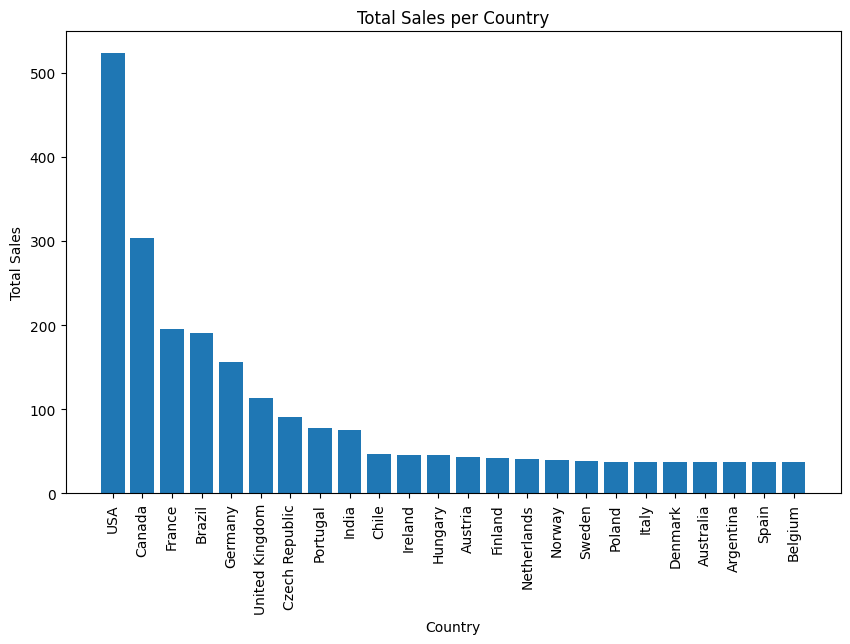

In [83]:
#Compliments of Chat
# Connect to SQLite database
conn = sqlite3.connect('chinook.db')

# Execute the query to get total sales per country
query = """
SELECT
    c.Country,
    SUM(i.Total) AS TotalSales
FROM
    Customers c
JOIN
    Invoices i ON c.CustomerId = i.CustomerId
GROUP BY
    c.Country
ORDER BY
    TotalSales DESC;
"""
# Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['TotalSales'])
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales per Country')
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.show()


<ipython-input-84-b1c1a01d0e12>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumberOfTracks', y='Genre', data=df, palette='coolwarm')


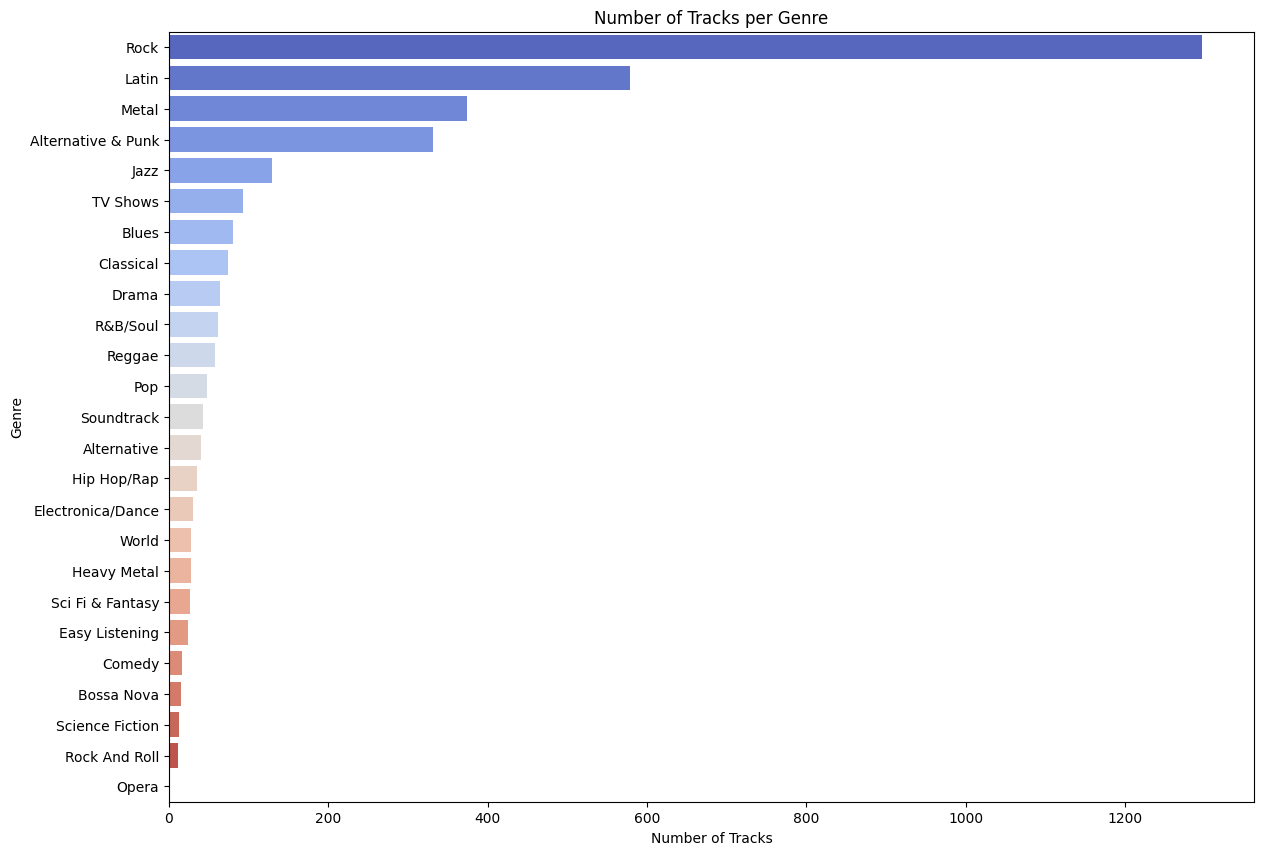

In [84]:
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('chinook.db')

# Execute the query and load data into a DataFrame
query = """
SELECT
    g.Name AS Genre,
    COUNT(t.TrackId) AS NumberOfTracks
FROM
    Tracks t
JOIN
    Genres g ON t.GenreId = g.GenreId
GROUP BY
    g.Name
ORDER BY
    NumberOfTracks DESC;
"""
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plot the data
plt.figure(figsize=(14, 10))
sns.barplot(x='NumberOfTracks', y='Genre', data=df, palette='coolwarm')
plt.title('Number of Tracks per Genre')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.show()


https://slidesgo.com/editor/share/9c623a63-857d-4ca8-a07f-390579223bf2#rs=link

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data
